# ALL PLOTS

#### This jupyter notebook aims to provide the pattern to the images that will be put in the soon-to-be-summited paper

### Packages

In [1]:
import numpy             as np
import pandas            as pd
import scipy.stats       as ss
import seaborn           as sns
import matplotlib.pyplot as plt
import arviz             as az
import os
from mpl_toolkits.mplot3d import Axes3D

### Plot parameters for this Jupyter Notebook

In [2]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 12,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

### Paths

In [3]:
results_path    = '../../LargeFilesResults/Model'       # where the outputs of this notebook will be saved
figs_paper_path = '../../LargeFilesResults/PaperFigs/'  # where the selected figures should be saved

# Posteriors

In [4]:
# prior = 'shared'
prior = 'rmshared'

In [5]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_'+prior+'_revised.csv'))

In [6]:
whan_classes = np.array(['Unclassified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF'])

In [7]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

In [8]:
palette = np.array(['#8c510a','#bf812d','#80cdc1','#35978f','#01665e'])

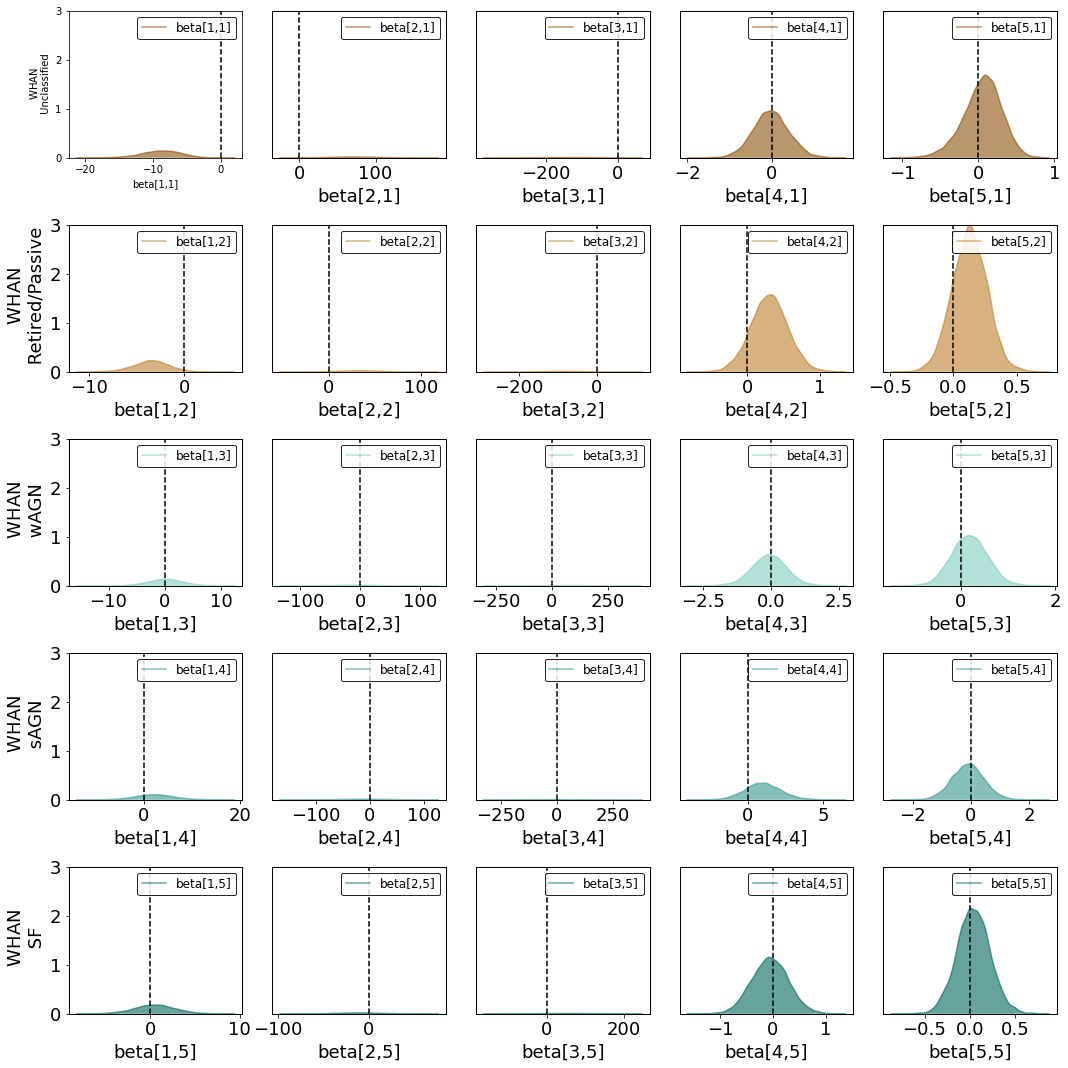

In [9]:
figsize = (15, 15)
alpha   = 0.6
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta], bw='silverman')
#         plt.hist(posteriors['%s' % str(name_temp)], color=palette[each_beta])
        plt.axvline(x=0, linestyle="--", color='black')
        plt.rcParams.update(plotpars)
        plt.legend(loc='upper right')
        plt.xlabel(r"%s" % str(name_temp))
#         plt.xlim([-1.8,1.8])
        plt.ylim([0,3.])
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta])       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1
plt.tight_layout(w_pad=0)
plt.savefig(os.path.join(figs_paper_path, '25betas_'+prior+'_revised.png'), bbox_inch='tight')
plt.savefig(os.path.join(figs_paper_path, '25betas_'+prior+'_revised.pdf'), bbox_inch='tight')
plt.show()

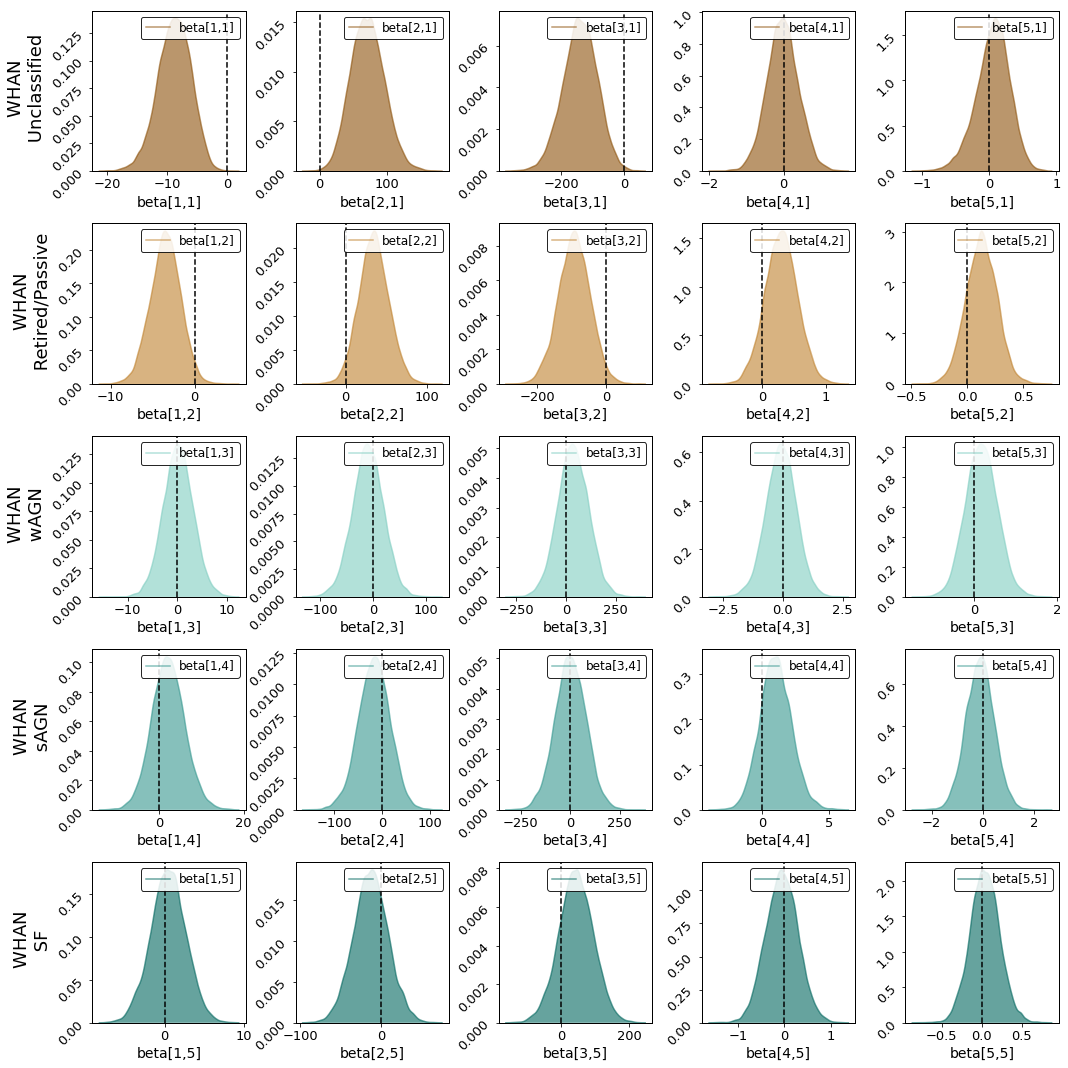

In [10]:
figsize = (15, 15)
alpha   = 0.6
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta], 
                           bw='silverman', legend=False)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.rcParams.update(plotpars)
        plt.legend(loc='upper right')
        plt.xlabel(r"%s" % str(name_temp), size=14)
        plt.tick_params('both', labelsize=13)
        plt.tick_params(axis='y', which='major', rotation=45)
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta])       
        position+=1
plt.tight_layout(w_pad=0.1)
plt.savefig(os.path.join(figs_paper_path, '25betas_'+prior+'_revised_scales.png'), bbox_inch='tight')
plt.savefig(os.path.join(figs_paper_path, '25betas_'+prior+'_revised_scales.pdf'), bbox_inch='tight')
plt.show()

In [11]:
sns.kdeplot?

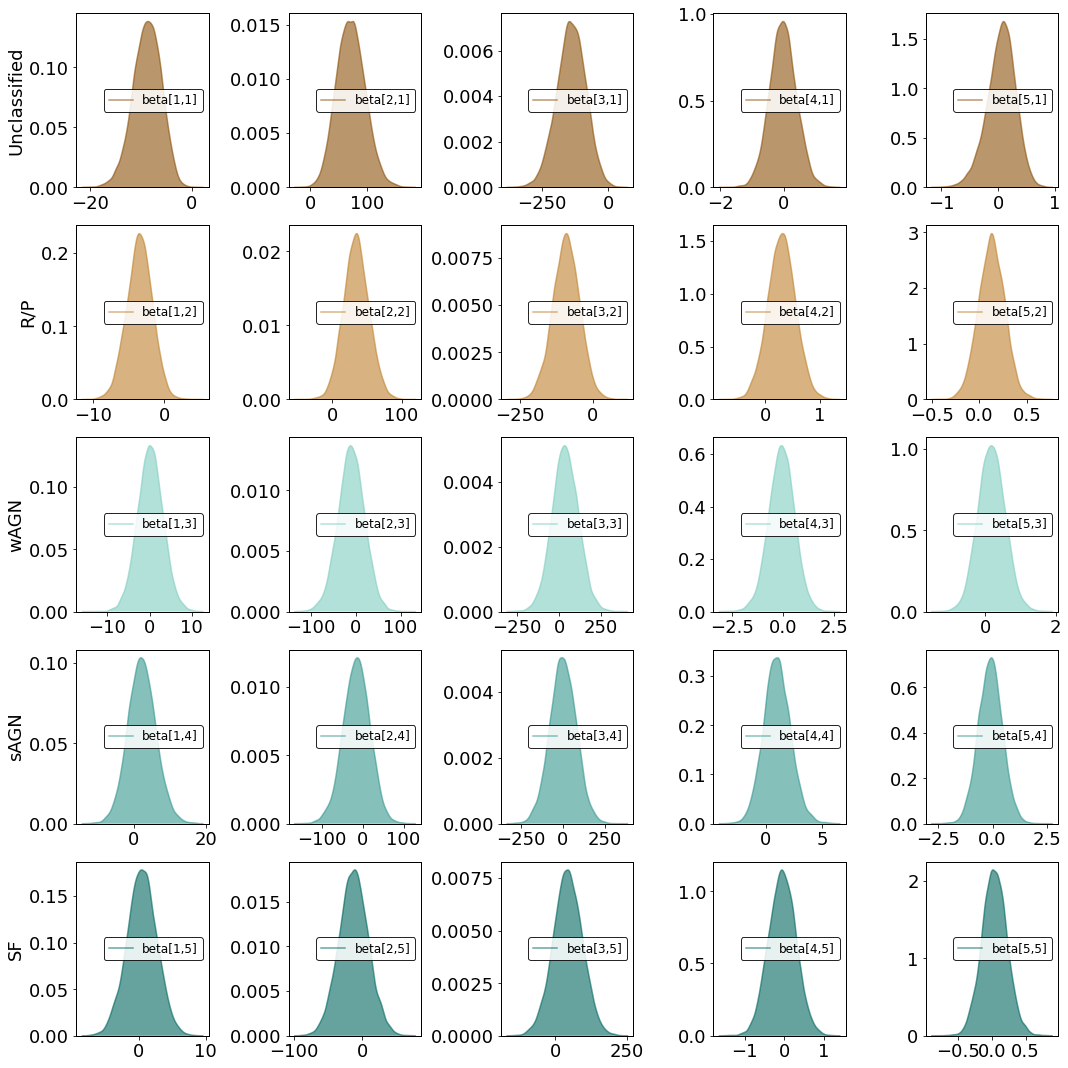

In [12]:
# xlim = [-1.8, 1.8]
ylim = [0, 3.]
plt.subplots(figsize=figsize)

plt.subplot(5,5,1)
sns.kdeplot(posteriors['beta[1,1]'], shade=True, alpha=alpha, color=palette[0])
plt.ylabel("Unclassified")
plt.Normalize(vmin=0., vmax=1.)
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,2)
sns.kdeplot(posteriors['beta[2,1]'], shade=True, alpha=alpha, color=palette[0])
plt.Normalize(vmin=0., vmax=1.)
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,3)
sns.kdeplot(posteriors['beta[3,1]'], shade=True, alpha=alpha, color=palette[0])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,4)
sns.kdeplot(posteriors['beta[4,1]'], shade=True, alpha=alpha, color=palette[0])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,5)
sns.kdeplot(posteriors['beta[5,1]'], shade=True, alpha=alpha, color=palette[0])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,6)
sns.kdeplot(posteriors['beta[1,2]'], shade=True, alpha=alpha, color=palette[1])
plt.ylabel("R/P")
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,7)
sns.kdeplot(posteriors['beta[2,2]'], shade=True, alpha=alpha, color=palette[1])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,8)
sns.kdeplot(posteriors['beta[3,2]'], shade=True, alpha=alpha, color=palette[1])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,9)
sns.kdeplot(posteriors['beta[4,2]'], shade=True, alpha=alpha, color=palette[1])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,10)
sns.kdeplot(posteriors['beta[5,2]'], shade=True, alpha=alpha, color=palette[1])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,11)
sns.kdeplot(posteriors['beta[1,3]'], shade=True, alpha=alpha, color=palette[2])
plt.ylabel("wAGN")
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,12)
sns.kdeplot(posteriors['beta[2,3]'], shade=True, alpha=alpha, color=palette[2])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,13)
sns.kdeplot(posteriors['beta[3,3]'], shade=True, alpha=alpha, color=palette[2])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,14)
sns.kdeplot(posteriors['beta[4,3]'], shade=True, alpha=alpha, color=palette[2])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,15)
sns.kdeplot(posteriors['beta[5,3]'], shade=True, alpha=alpha, color=palette[2])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,16)
sns.kdeplot(posteriors['beta[1,4]'], shade=True, alpha=alpha, color=palette[3])
plt.ylabel("sAGN")
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,17)
sns.kdeplot(posteriors['beta[2,4]'], shade=True, alpha=alpha, color=palette[3])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,18)
sns.kdeplot(posteriors['beta[3,4]'], shade=True, alpha=alpha, color=palette[3])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,19)
sns.kdeplot(posteriors['beta[4,4]'], shade=True, alpha=alpha, color=palette[3])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,20)
sns.kdeplot(posteriors['beta[5,4]'], shade=True, alpha=alpha, color=palette[3])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,21)
sns.kdeplot(posteriors['beta[1,5]'], shade=True, alpha=alpha, color=palette[4])
plt.ylabel("SF")
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,22)
sns.kdeplot(posteriors['beta[2,5]'], shade=True, alpha=alpha, color=palette[4])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,23)
sns.kdeplot(posteriors['beta[3,5]'], shade=True, alpha=alpha, color=palette[4])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,24)
sns.kdeplot(posteriors['beta[4,5]'], shade=True, alpha=alpha, color=palette[4])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.subplot(5,5,25)
sns.kdeplot(posteriors['beta[5,5]'], shade=True, alpha=alpha, color=palette[4])
# plt.xlim(xlim)
# plt.ylim(ylim)

plt.tight_layout()
plt.show()

In [13]:
posteriors_dictionary = {}
for i in range(posteriors.keys().size):
    posteriors_dictionary['%s' % (posteriors.keys()[i])] = posteriors.values[i]

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  """


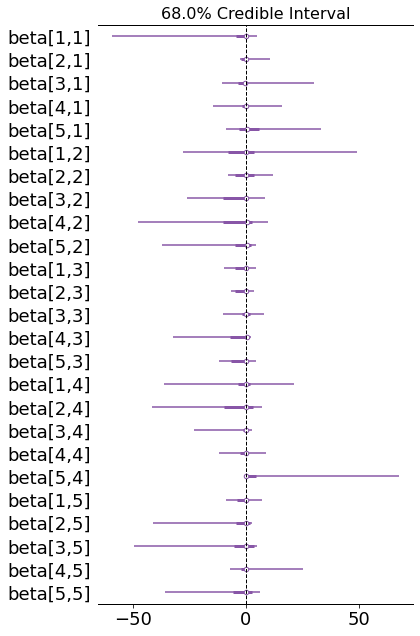

In [14]:
plt.rcParams.update(plotpars)
az.plot_forest(data=posteriors_dictionary, var_names=list(posteriors.keys()), figsize=(6,9), r_hat=False,
               credible_interval=0.68, quartiles=True, colors='#8856a7')
plt.axvline(x=0, color='black', linewidth=1., linestyle='--')
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, '25betas_forest_'+prior+'_revised.png'))
plt.savefig(os.path.join(figs_paper_path, '25betas_forest_'+prior+'_revised.pdf'))
plt.show()

# FIT

In [15]:
# summary = pd.read_csv(os.path.join(results_path, 'allprobabilities_summ_revised.csv'),index_col="Unnamed: 0")
summary = pd.read_csv(os.path.join(results_path, 'allprobabilities_summ_rmshared_revised.csv'),index_col="Unnamed: 0")

In [16]:
all_files_dir = np.sort(os.listdir(results_path))

In [17]:
name = 'data_for_plotting'
print(len(name))

17


In [18]:
files_fit_to_plot = []
for i in range(all_files_dir.size):
    if all_files_dir[i][0:17]==name:
        files_fit_to_plot.append(all_files_dir[i])
    else:
        continue

In [19]:
fit_palette = ['#e0ecf4','#9ebcda','#8856a7']

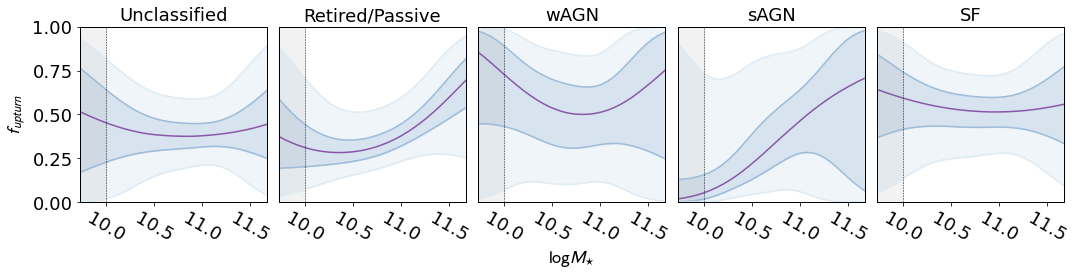

In [20]:
plt.subplots(figsize=(15,4))
for i in range(len(files_fit_to_plot)-1):        
    current_class = pd.read_csv(os.path.join(results_path, files_fit_to_plot[i]))
    plot_temp = plt.subplot(1, 5, (i+1))
    plt.plot(current_class['LOG_STELLAR_MASS'], current_class['50%'], '-', color=fit_palette[2]) 
    plt.plot(current_class['LOG_STELLAR_MASS'], current_class['25%'], '-', color=fit_palette[1])
    plt.plot(current_class['LOG_STELLAR_MASS'], current_class['75%'], '-', color=fit_palette[1])
    
    plt.fill_between(current_class['LOG_STELLAR_MASS'], current_class['25%'], current_class['75%'], 
                     color=fit_palette[1], alpha=0.5)
    
    plt.plot(current_class['LOG_STELLAR_MASS'], current_class['2.5%'], '-', color=fit_palette[0])
    plt.plot(current_class['LOG_STELLAR_MASS'], current_class['97.5%'], '-', color=fit_palette[0])
    plt.fill_between(current_class['LOG_STELLAR_MASS'], current_class['2.5%'], current_class['97.5%'], 
                     color=fit_palette[0], alpha=0.5)
    plt.axvline(x=10, ls='--', lw=0.5, color='black')
    plt.axvspan(xmin=current_class['LOG_STELLAR_MASS'].min(), xmax=10, facecolor='gray', alpha=0.1)
    plt.title("%s" % (whan_classes[i]), fontsize=18)
    plt.rcParams.update(plotpars)
    plt.ylim([0., 1.])
    plt.xlim([current_class['LOG_STELLAR_MASS'].min(), current_class['LOG_STELLAR_MASS'].max()])
    plt.xticks([10, 10.5, 11, 11.5])
    plt.tick_params(axis='x', which='major', rotation=-30)
    if i==0:
        plt.ylabel(r"$f_{upturn}$")
    elif i>0:
        plot_temp.yaxis.set_visible(False)
        if i==2:
            plt.xlabel(r"$\log M_{\star}$")
        else:
            continue
    else:
        continue
        
plt.tight_layout(w_pad=0.)
plt.savefig(os.path.join(figs_paper_path, 'mass_'+prior+'_regression_meanZ.png'))
plt.savefig(os.path.join(figs_paper_path, 'mass_'+prior+'_regression_meanZ.pdf'))
plt.show()

In [21]:
header        = summary.keys()
classes       = np.split(summary.values, 5)
unique_masses = np.unique(summary["LOG_STELLAR_MASS"].values)  # for the mass slice
unique_masses

array([ 9.729482  ,  9.79669193,  9.86390186,  9.93111179,  9.99832172,
       10.06553166, 10.13274159, 10.19995152, 10.26716145, 10.33437138,
       10.40158131, 10.46879124, 10.53600117, 10.6032111 , 10.67042103,
       10.73763097, 10.8048409 , 10.87205083, 10.93926076, 11.00647069,
       11.07368062, 11.14089055, 11.20810048, 11.27531041, 11.34252034,
       11.40973028, 11.47694021, 11.54415014, 11.61136007, 11.67857   ])

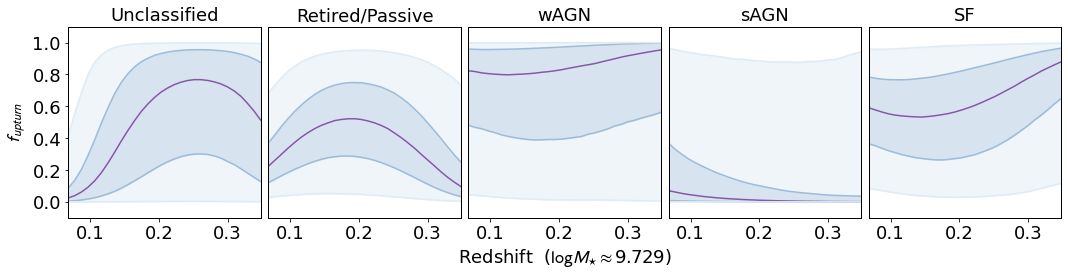

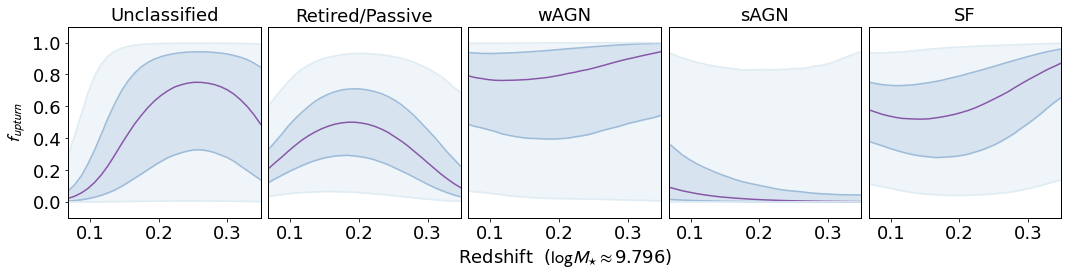

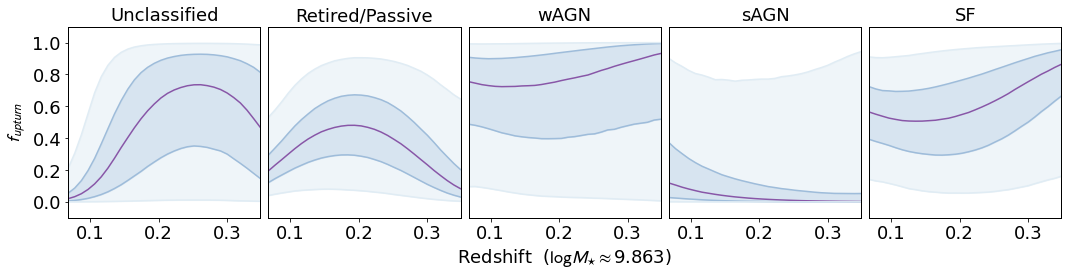

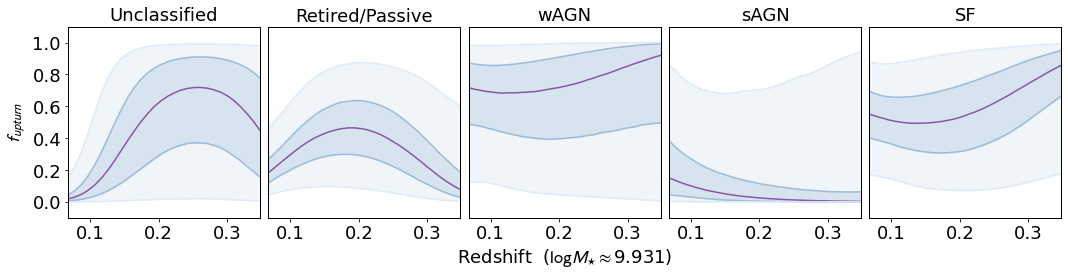

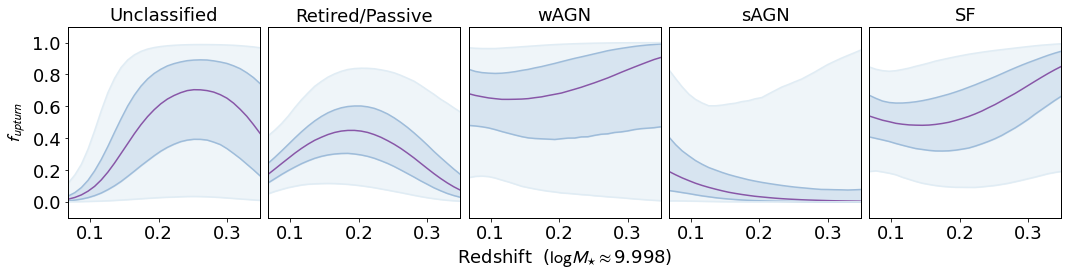

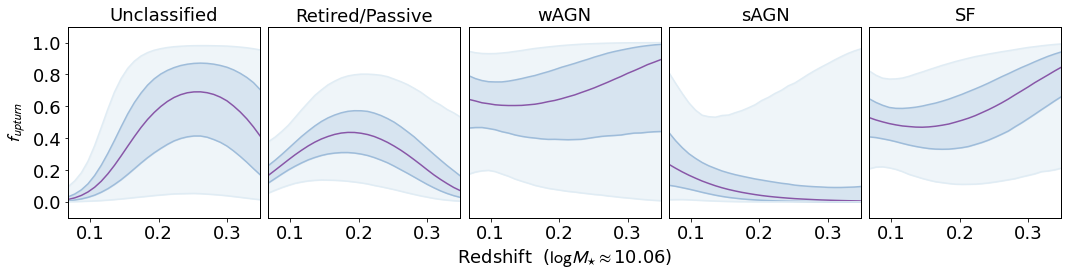

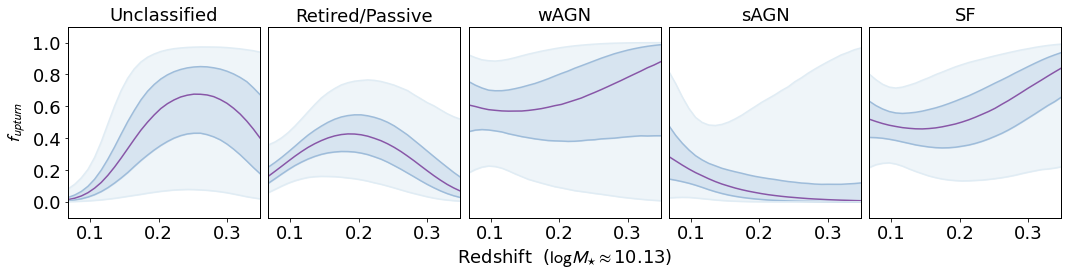

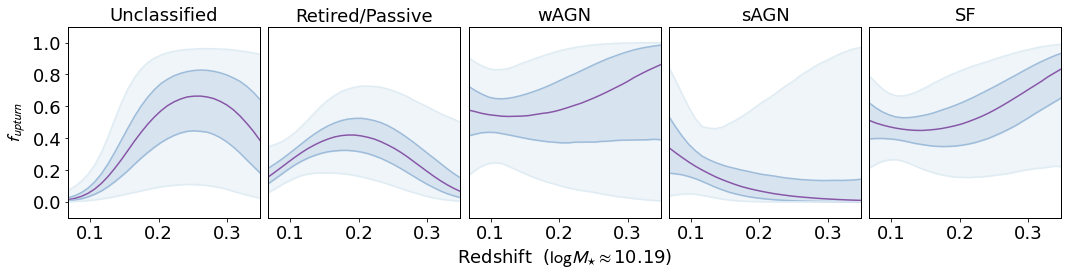

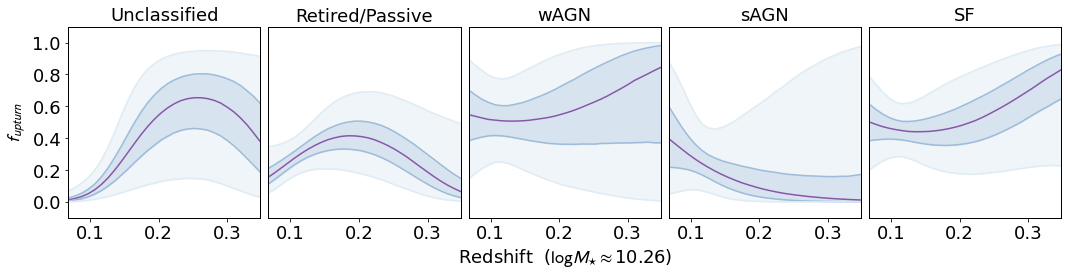

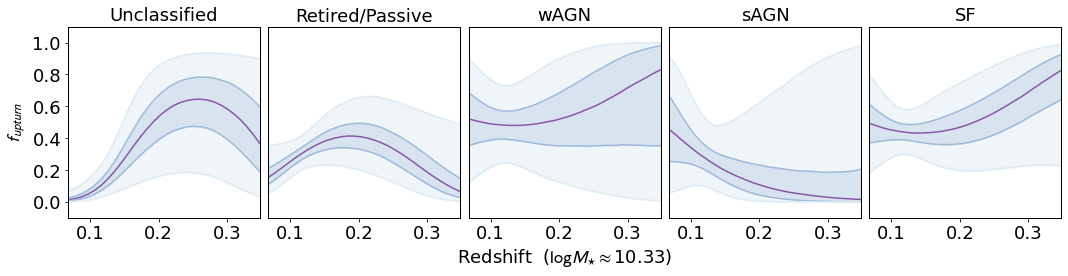

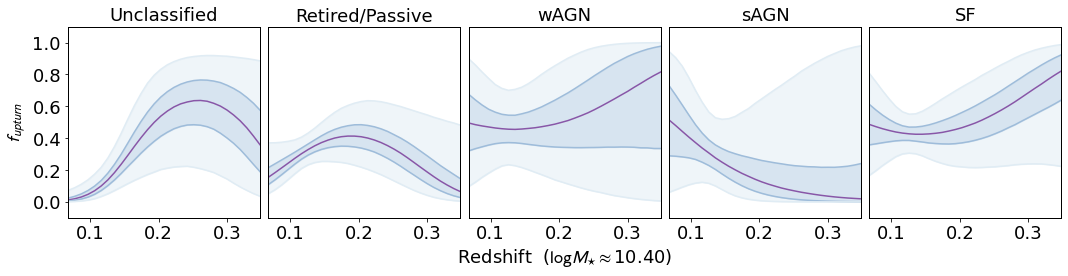

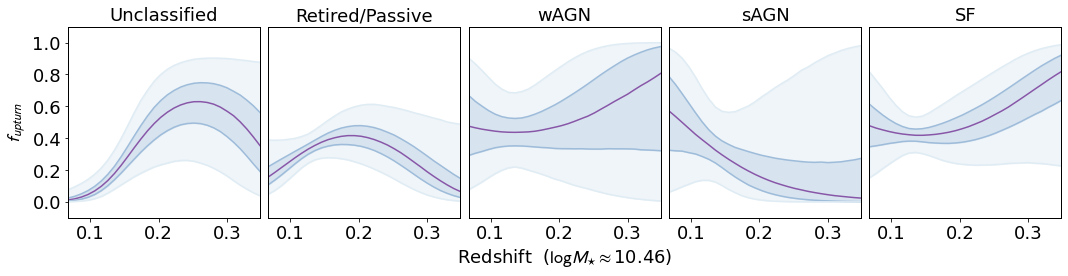

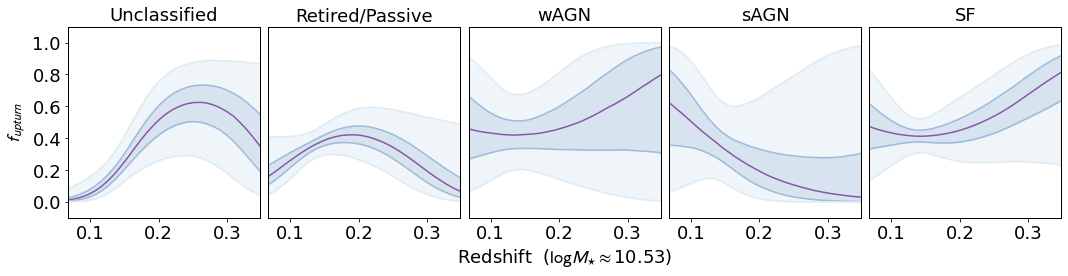

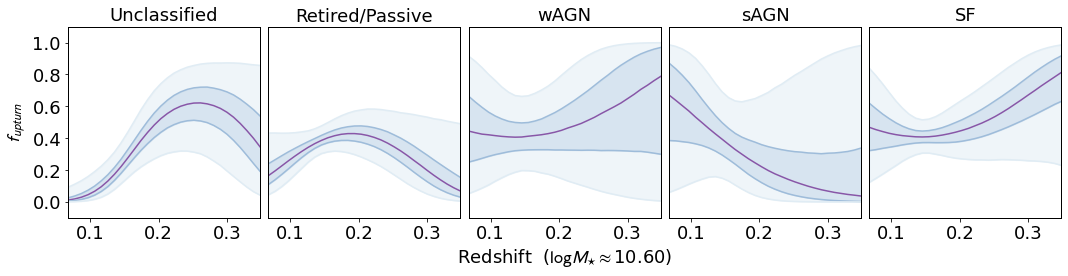

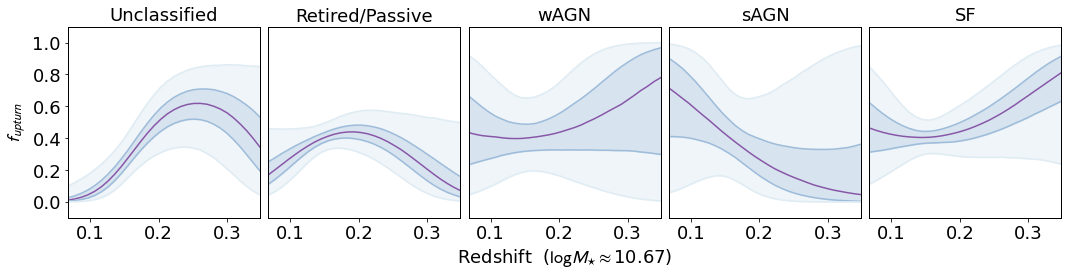

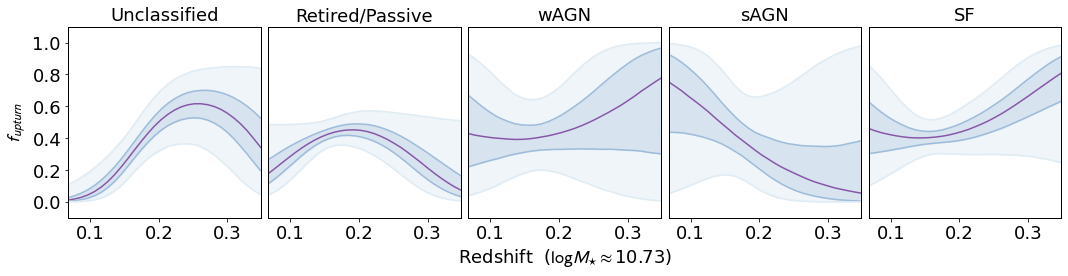

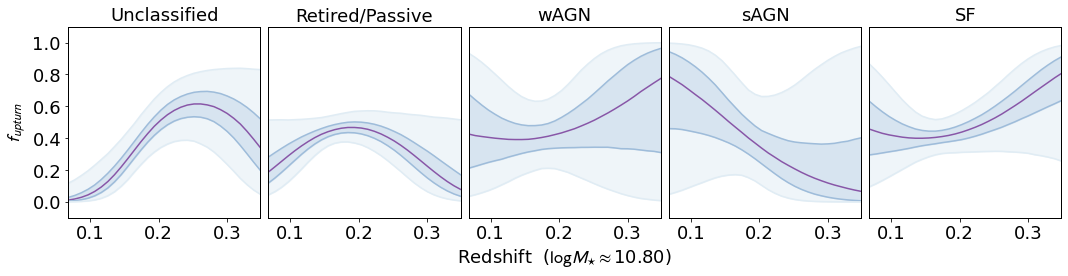

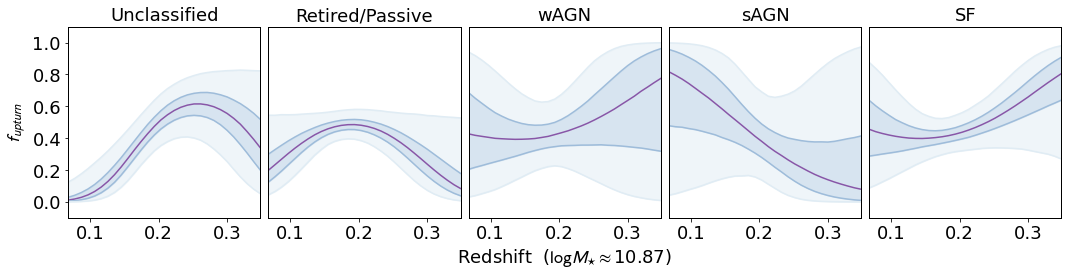

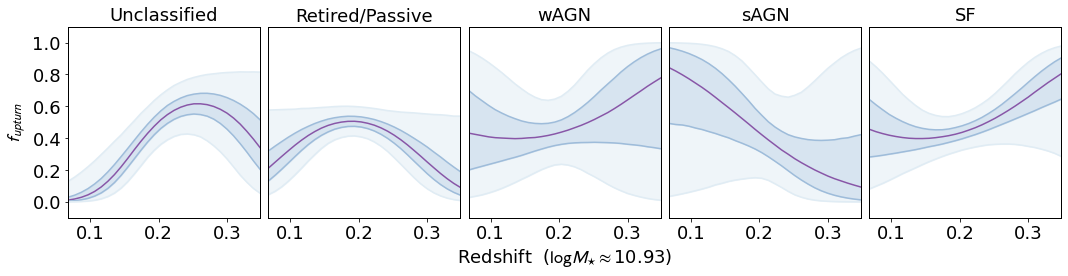

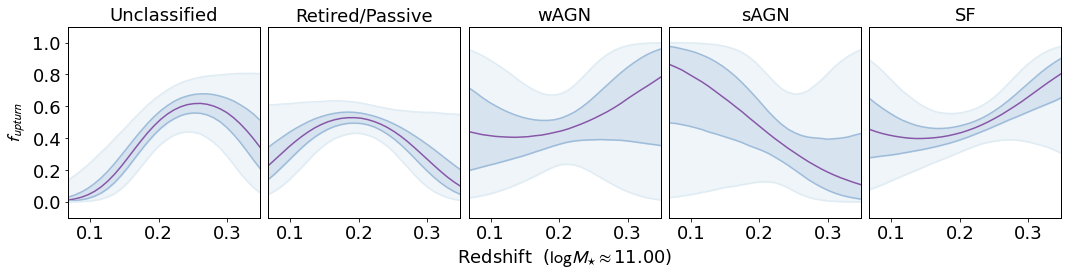

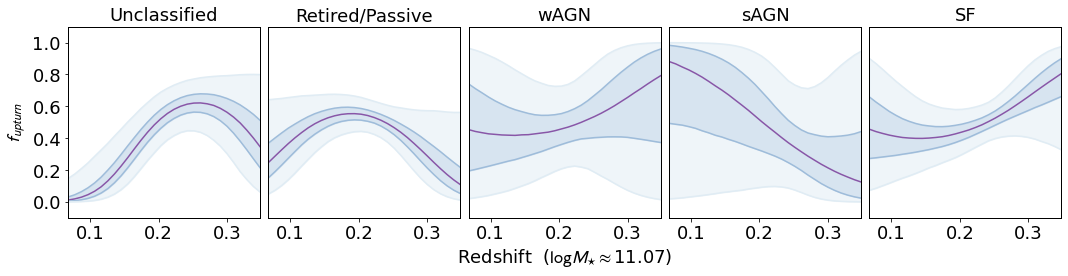

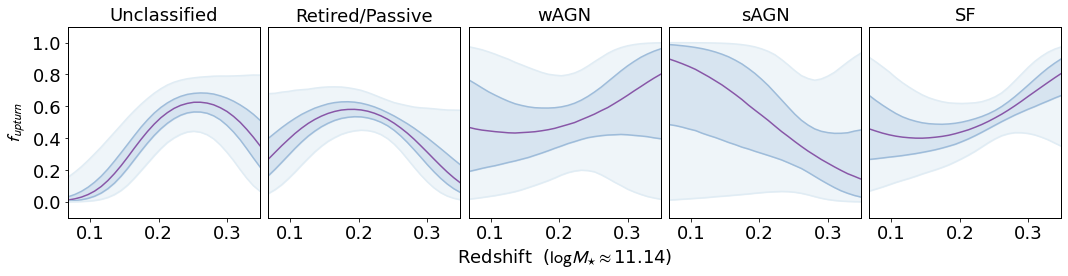

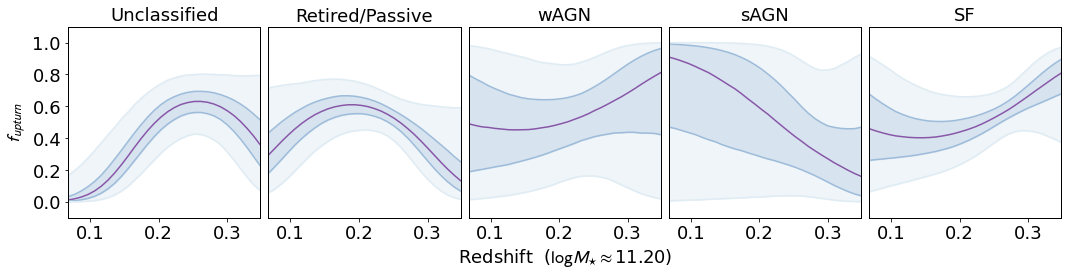

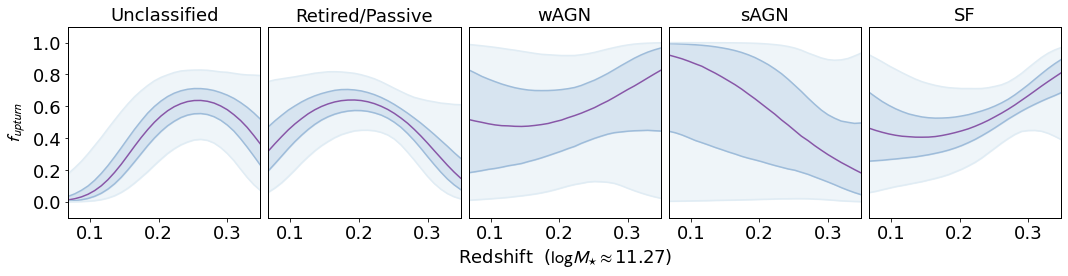

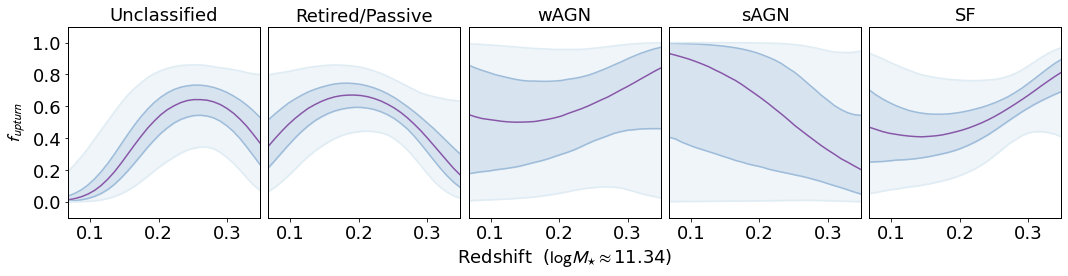

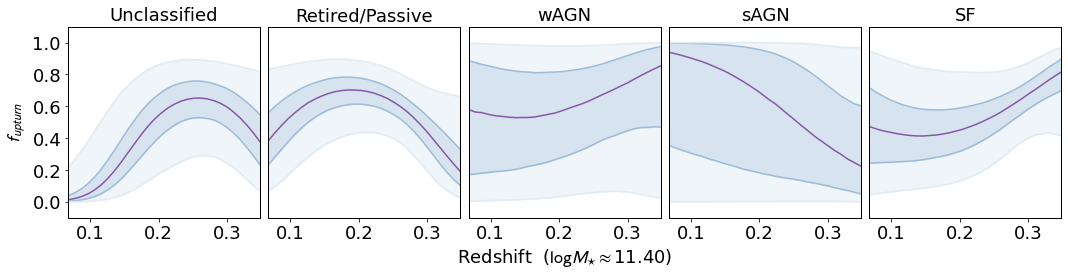

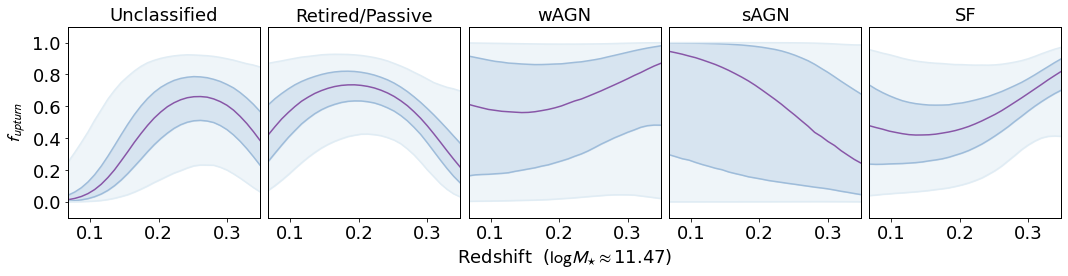

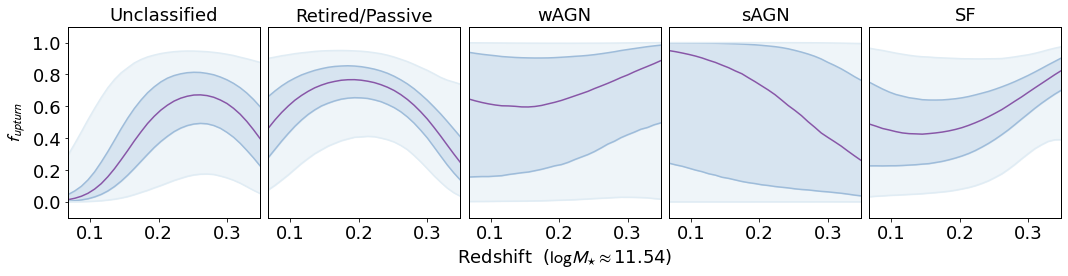

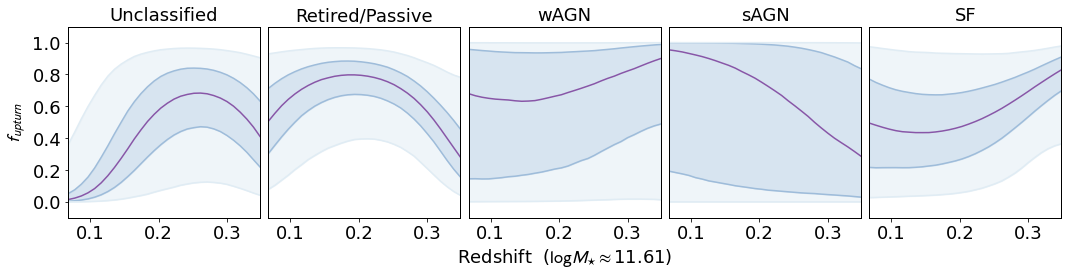

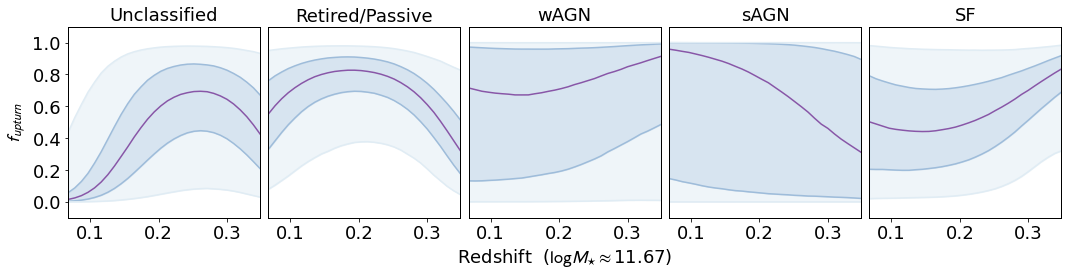

In [22]:
fit_palette = ['#e0ecf4','#9ebcda','#8856a7']
for m in range(unique_masses.size):
    plt.subplots(figsize=(15,4))
    name_to_save = str(unique_masses[m]).split('.')[0] + '_' + str(unique_masses[m]).split('.')[1][:3]
    for i in range(len(classes)):
        current_class = pd.DataFrame(classes[i])
        current_class.columns = header
        idx_slice = np.where(current_class["LOG_STELLAR_MASS"].values==unique_masses[m])

        plot_temp = plt.subplot(1, 5, (i+1))

        plt.plot(current_class["Z"].iloc[idx_slice], current_class['50%'].iloc[idx_slice], '-', color=fit_palette[2])    
        plt.plot(current_class["Z"].iloc[idx_slice], current_class['25%'].iloc[idx_slice], '-', color=fit_palette[1])    
        plt.plot(current_class["Z"].iloc[idx_slice], current_class['75%'].iloc[idx_slice], '-', color=fit_palette[1])
        plt.fill_between(current_class["Z"].iloc[idx_slice], current_class['25%'].iloc[idx_slice], 
                         current_class['75%'].iloc[idx_slice], color=fit_palette[1], alpha=0.5)

        plt.plot(current_class["Z"].iloc[idx_slice], current_class['2.5%'].iloc[idx_slice], '-', color=fit_palette[0])    
        plt.plot(current_class["Z"].iloc[idx_slice], current_class['97.5%'].iloc[idx_slice], '-', color=fit_palette[0])
        plt.fill_between(current_class["Z"].iloc[idx_slice], current_class['2.5%'].iloc[idx_slice], 
                         current_class['97.5%'].iloc[idx_slice], color=fit_palette[0], alpha=0.5)

        plt.title("%s" % (whan_classes[i]), fontsize=18)
        plt.rcParams.update(plotpars)
        plt.ylim([-0.1, 1.1])
        plt.xlim([current_class["Z"].min(), current_class["Z"].max()])
        plt.yticks([0., 0.2, 0.4, 0.6, 0.8, 1.])
        if i==0:
            plt.ylabel(r"$f_{upturn}$")
        elif i>0:
            plot_temp.yaxis.set_visible(False)
            if i==2:
                plt.xlabel(r"Redshift  ($\log M_{\star} \approx$%5.5s)" % str(unique_masses[m]))
            else:
                continue
        plt.tight_layout(w_pad=0.)
    plt.savefig(os.path.join(figs_paper_path, 'z_'+prior+'_regression_slice_%s.png' %  name_to_save))
    plt.savefig(os.path.join(figs_paper_path, 'z_'+prior+'_regression_slice_%s.pdf' %  name_to_save))
    plt.show()

# Complementary charts for paper 01

In [23]:
data = pd.read_csv('../../Catalogue/Match07_smalldoubleclean_emlines.csv')

In [24]:
my_data = data.loc[data['Z']<=0.4]

In [25]:
my_data = my_data.loc[my_data['UV_CLASS_YI2011']!='RSF']

In [26]:
my_data = my_data.loc[my_data['D4000N']>0]
my_data = my_data.fillna('Unclassified')

In [27]:
my_data = my_data.replace({'UV_UPTURN': 'UV upturn'}).replace({'UV_WEAK': 'UV weak'})

In [28]:
for i in my_data.keys():
    print(i)

CATAID
OBJID_SDSSDR7
ALPHA_J2000
DELTA_J2000
KRON_RADIUS
PETRO_RADIUS
MAG_PETRO_u
MAGERR_PETRO_u
FLAGS_u
MAG_PETRO_g
MAGERR_PETRO_g
FLAGS_g
MAG_PETRO_r
MAGERR_PETRO_r
FLAGS_r
MAG_PETRO_i
MAGERR_PETRO_i
FLAGS_i
MAG_PETRO_z
MAGERR_PETRO_z
FLAGS_z
MAG_PETRO_X
MAGERR_PETRO_X
FLAGS_X
MAG_PETRO_Y
MAGERR_PETRO_Y
FLAGS_Y
MAG_PETRO_J
MAGERR_PETRO_J
FLAGS_J
MAG_PETRO_H
MAGERR_PETRO_H
FLAGS_H
MAG_PETRO_K
MAGERR_PETRO_K
FLAGS_K
FLAGS
PSFMAG_R
FIBERMAG_R
FLAGS_R_SDSS
PETRORAD_R
PETROR90_R
PETROR50_R
PETROMAG_R
MODELMAG_U
MODELMAG_G
MODELMAG_R
MODELMAG_I
MODELMAG_Z
STATUS
BEST_MAG_NUV
BEST_MAGERR_NUV
BEST_MAG_FUV
BEST_MAGERR_FUV
BEST_METHOD
NMATCHUV
NMATCHOPT
NUVFLAG
FUVFLAG
NN_DIST
NN_NMATCH4
NN_MANY2ONE
NN_SFLAGS_NUV
NN_SFLAGS_FUV
KCORR_FUV
KCORR_NUV
KCORR_U
KCORR_G
KCORR_R
KCORR_I
KCORR_Z
KCORR_Y
KCORR_J
KCORR_H
KCORR_K
CHI2
MASS
INTSFH
METS
B300
B1000
SURVEY_CODE
SURVEY_CLASS
nbands
S2N
PPP
logmstar
dellogmstar
logmoverl_i
dellogmoverl_i
logage
dellogage
logtau
dellogtau
logmintsfh
dellogmintsfh

In [29]:
# palette_c = ['#9ebcda','#8c96c6','#8c6bb1','#88419d','#6e016b']
palette_c = ['#8c96c6','#6e016b']
text_bbox = dict(facecolor='#f7f7f7', edgecolor='black', boxstyle='round')
handles = ['UV weak', 'UV upturn']

### Boxplot heaven

In [30]:
sns.boxenplot??

No handles with labels found to put in legend.


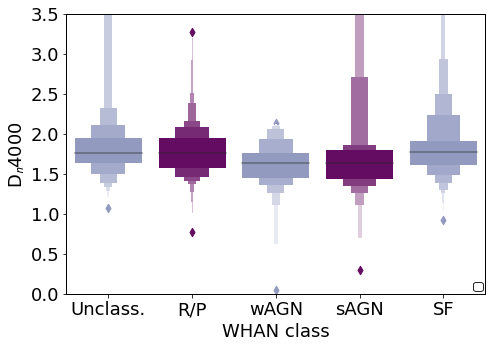

In [31]:
plt.rcParams.update(plotpars)
lvplot = sns.boxenplot(x=my_data['WHAN_CLASS'].values, y=my_data['D4000N'].values, data=my_data, palette=palette_c,
#                        hue=my_data['UV_CLASS_YI2011'] 
                       order=['Unclassified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF'], 
                       k_depth='trustworthy', outlier_prop=0.2, scale='exponential', saturation=0.8)
plt.xticks([0,1,2,3,4], ['Unclass.', 'R/P', 'wAGN', 'sAGN', 'SF'])
plt.xlabel("WHAN class")
plt.ylabel("D$_n$4000")
lvplot.legend(loc='lower right', borderaxespad=0.2, ncol=2)
plt.ylim([0,3.5])
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, 'lvplot_dn4000.png'), bbox_inch='tight')
plt.savefig(os.path.join(figs_paper_path, 'lvplot_dn4000.pdf'), bbox_inch='tight')
plt.show()

No handles with labels found to put in legend.


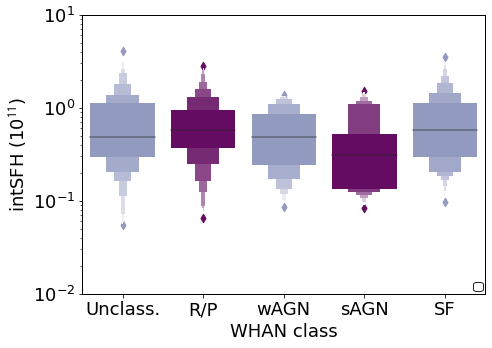

In [32]:
plt.rcParams.update(plotpars)
lvplot = sns.boxenplot(x=my_data['WHAN_CLASS'].values, y=my_data['INTSFH'].values/(10**(11)), data=my_data, 
                       palette=palette_c, 
#                        hue='UV_CLASS_YI2011', 
                       order=['Unclassified', 'Retired/Passive', 'wAGN', 
                                                                        'sAGN', 'SF'], 
                       k_depth='trustworthy', outlier_prop=0.2, scale='exponential', saturation=0.8)
plt.xticks([0,1,2,3,4], ['Unclass.', 'R/P', 'wAGN', 'sAGN', 'SF'])
plt.xlabel("WHAN class")
plt.ylabel("intSFH (10$^{11}$)")
lvplot.legend(loc='lower right', borderaxespad=0.2, ncol=2)
plt.ylim([10**(-2), 10**(1)])
plt.yticks([10**(-2), 10**(-1), 10**0, 10**(1)])
plt.yscale('log')
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, 'lvplot_intsfh.png'), bbox_inch='tight')
plt.savefig(os.path.join(figs_paper_path, 'lvplot_intsfh.pdf'), bbox_inch='tight')
plt.show()

No handles with labels found to put in legend.


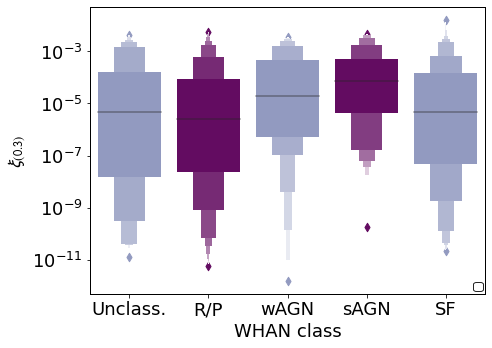

In [33]:
plt.rcParams.update(plotpars)
lvplot = sns.boxenplot(x='WHAN_CLASS', y='B300', data=my_data, palette=palette_c, 
#                        hue='UV_CLASS_YI2011', 
                       order=['Unclassified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF'], k_depth='trustworthy', 
                       outlier_prop=0.2, scale='exponential', saturation=0.8)
plt.yscale('log')
lvplot.legend(loc='lower right', borderaxespad=0.2, ncol=2)
plt.xticks([0,1,2,3,4], ['Unclass.', 'R/P', 'wAGN', 'sAGN', 'SF'])
plt.xlabel("WHAN class")
plt.ylabel(r"$\xi_{(0.3)}$")
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, 'lvplot_B300.png'), bbox_inch='tight')
plt.savefig(os.path.join(figs_paper_path, 'lvplot_B300.pdf'), bbox_inch='tight')
plt.show()

No handles with labels found to put in legend.


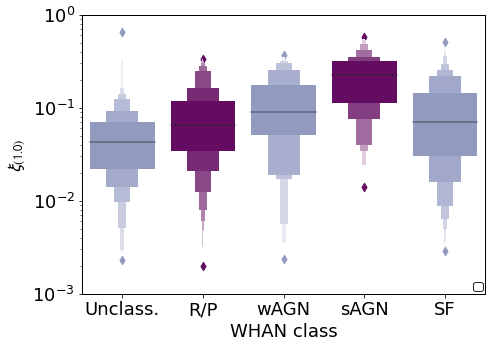

In [34]:
plt.rcParams.update(plotpars)
lvplot = sns.boxenplot(x='WHAN_CLASS', y='B1000', data=my_data, palette=palette_c, 
#                        hue='UV_CLASS_YI2011',
                       order=['Unclassified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF'], k_depth='trustworthy', 
                       outlier_prop=0.2, scale='exponential', saturation=0.8)
plt.yscale('log')
plt.xticks([0,1,2,3,4], ['Unclass.', 'R/P', 'wAGN', 'sAGN', 'SF'])
plt.ylim([10**(-3), 10**(0)])
plt.yticks([10**(-3), 10**(-2), 10**(-1), 10**(0)])
plt.xlabel("WHAN class")
plt.ylabel(r"$\xi_{(1.0)}$")
lvplot.legend(loc='lower right', borderaxespad=0.2, ncol=2)
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, 'lvplot_B1000.png'), bbox_inch='tight')
plt.savefig(os.path.join(figs_paper_path, 'lvplot_B1000.pdf'), bbox_inch='tight')
plt.show()

No handles with labels found to put in legend.


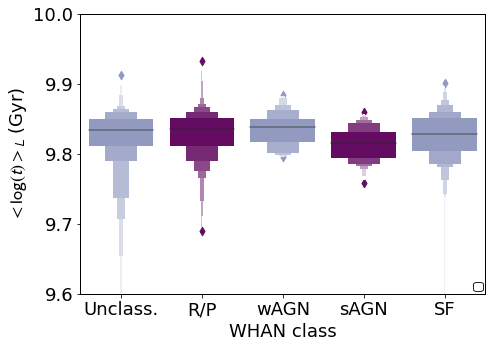

In [35]:
plt.rcParams.update(plotpars)
lvplot = sns.boxenplot(x='WHAN_CLASS', y='logage', data=my_data, palette=palette_c, 
#                        hue='UV_CLASS_YI2011',
                       order=['Unclassified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF'], k_depth='trustworthy', 
                       outlier_prop=0.2, scale='exponential', saturation=0.8)
plt.xticks([0,1,2,3,4], ['Unclass.', 'R/P', 'wAGN', 'sAGN', 'SF'])
lvplot.legend(loc='lower right', borderaxespad=0.2, ncol=2)
plt.xlabel("WHAN class")
plt.ylabel("$<\log(t)>_{L}$ (Gyr)")
plt.ylim([9.6,10.])
plt.yticks([9.6, 9.7, 9.8, 9.9, 10.])
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, 'lvplot_logage.png'), bbox_inch='tight')
plt.savefig(os.path.join(figs_paper_path, 'lvplot_logage.pdf'), bbox_inch='tight')
plt.show()

No handles with labels found to put in legend.


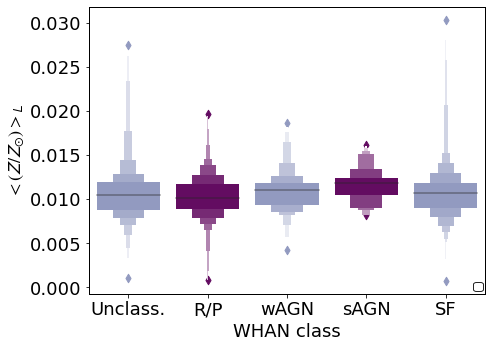

In [36]:
plt.rcParams.update(plotpars)
lvplot = sns.boxenplot(x='WHAN_CLASS', y='metal', data=my_data, palette=palette_c, 
#                        hue='UV_CLASS_YI2011',
                       order=['Unclassified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF'], k_depth='trustworthy', 
                       outlier_prop=0.2, saturation=0.8, scale='exponential')
lvplot.legend(loc='lower right', borderaxespad=0.2, ncol=2)
plt.xticks([0,1,2,3,4], ['Unclass.', 'R/P', 'wAGN', 'sAGN', 'SF'])
plt.xlabel("WHAN class")
plt.ylabel(r"$<(Z/Z_{\odot})>_{L}$")
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, 'lvplot_metal.png'), bbox_inch='tight')
plt.savefig(os.path.join(figs_paper_path, 'lvplot_metal.pdf'), bbox_inch='tight')
plt.show()

No handles with labels found to put in legend.


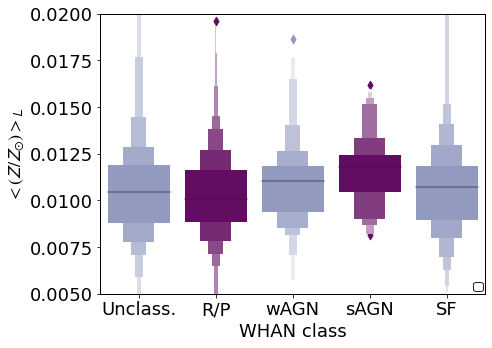

In [37]:
plt.rcParams.update(plotpars)
lvplot = sns.boxenplot(x='WHAN_CLASS', y='metal', data=my_data, palette=palette_c, 
#                        hue='UV_CLASS_YI2011',
                       order=['Unclassified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF'], k_depth='trustworthy', 
                       outlier_prop=0.2, saturation=0.8, scale='exponential')
lvplot.legend(loc='lower right', borderaxespad=0.2, ncol=2)
plt.xticks([0,1,2,3,4], ['Unclass.', 'R/P', 'wAGN', 'sAGN', 'SF'])
plt.xlabel("WHAN class")
plt.ylabel(r"$<(Z/Z_{\odot})>_{L}$")
plt.ylim([0.005, 0.020])
plt.tight_layout()
# plt.savefig(os.path.join(figs_paper_path, 'lvplot_metal.png'), bbox_inch='tight')
# plt.savefig(os.path.join(figs_paper_path, 'lvplot_metal.pdf'), bbox_inch='tight')
plt.show()

# Simple fits

In [38]:
summary = pd.read_csv(os.path.join(results_path, 'fit_summ_noemlines.csv'))

In [39]:
chosen_mass = np.unique(summary['LOG_STELLAR_MASS'].values)[-1]
chosen_mass

11.67857

In [40]:
subset_mass = summary[summary['LOG_STELLAR_MASS']==chosen_mass]
name_to_save = str(chosen_mass).split('.')[0] + '_' + str(chosen_mass).split('.')[1][:3]

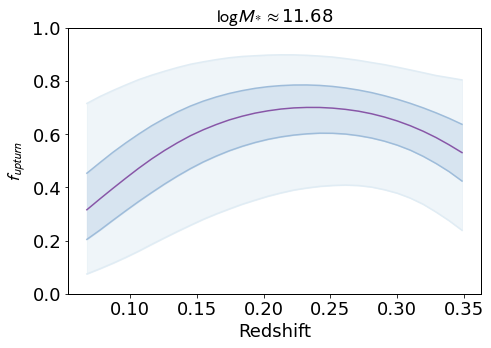

In [41]:
plt.rcParams.update(plotpars)

plt.plot(subset_mass['Z'], subset_mass['50%'], '-', color=fit_palette[2])
plt.plot(subset_mass['Z'], subset_mass['25%'], '-', color=fit_palette[1])
plt.plot(subset_mass['Z'], subset_mass['75%'], '-', color=fit_palette[1])
plt.plot(subset_mass['Z'], subset_mass['2.5%'], '-', color=fit_palette[0])
plt.plot(subset_mass['Z'], subset_mass['97.5%'], '-', color=fit_palette[0])
plt.fill_between(subset_mass['Z'], subset_mass['25%'], subset_mass['75%'], color=fit_palette[1], alpha=0.5)
plt.fill_between(subset_mass['Z'], subset_mass['2.5%'], subset_mass['97.5%'], color=fit_palette[0], alpha=0.5)
plt.ylim([0,1.])
plt.ylabel(r"$f_{upturn}$")
plt.xlabel("Redshift")
plt.title(r"$\log M_*\approx$%.2f" % (chosen_mass), fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, 'z_noemlines_%s.png' %  name_to_save))
plt.savefig(os.path.join(figs_paper_path, 'z_noemlines_%s.pdf' %  name_to_save))
plt.show()

In [42]:
chosen_z = np.unique(summary['Z'].values)[20]
chosen_z

0.261291724137931

In [43]:
subset_z = summary[summary['Z']==chosen_z]
name_to_save = str(chosen_z).split('.')[0] + '_' + str(chosen_z).split('.')[1][:3]

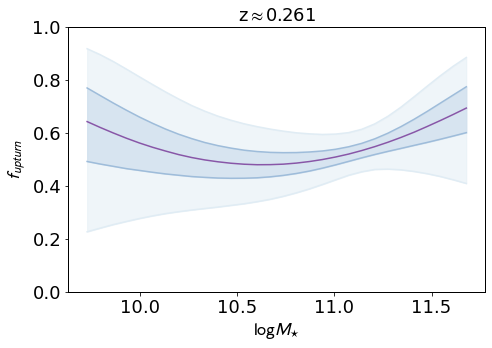

In [44]:
plt.plot(subset_z['LOG_STELLAR_MASS'], subset_z['50%'], '-', color=fit_palette[2])
plt.plot(subset_z['LOG_STELLAR_MASS'], subset_z['25%'], '-', color=fit_palette[1])
plt.plot(subset_z['LOG_STELLAR_MASS'], subset_z['75%'], '-', color=fit_palette[1])
plt.plot(subset_z['LOG_STELLAR_MASS'], subset_z['2.5%'], '-', color=fit_palette[0])
plt.plot(subset_z['LOG_STELLAR_MASS'], subset_z['97.5%'], '-', color=fit_palette[0])
plt.fill_between(subset_z['LOG_STELLAR_MASS'], subset_z['25%'], subset_z['75%'], color=fit_palette[1], alpha=0.5)
plt.fill_between(subset_z['LOG_STELLAR_MASS'], subset_z['2.5%'], subset_z['97.5%'], color=fit_palette[0], alpha=0.5)
plt.ylim([0,1.])
plt.ylabel(r"$f_{upturn}$")
plt.xlabel(r"$\log M_{\star}$")
plt.title(r"z$\approx$%.3f" % chosen_z, fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, 'mass_noemlines_%s.png' %  name_to_save))
plt.savefig(os.path.join(figs_paper_path, 'mass_noemlines_%s.pdf' %  name_to_save))
plt.show()

# Set of plots

In [45]:
plotpars3 = {'axes.linewidth': 1.,
             'axes.labelsize': 18,
             'xtick.labelsize': 18,
             'ytick.labelsize': 18,
             'legend.frameon': True,
             'legend.framealpha': 0.85,
             'legend.edgecolor': 'black',
             'legend.loc': 'upper right',
             'legend.fontsize': 12,
             'font.size':12,
             'figure.figsize': (15, 4)
             }

In [46]:
idx_m = [5, 11, 16, 25, 29]
idx_z = [0, 5, 10, 15, 25]
chosen_mass     = np.unique(summary['LOG_STELLAR_MASS'].values)[idx_m]
chosen_redshift = np.unique(summary['Z'].values)[idx_z]

In [47]:
plt.rcParams.update(plotpars3)

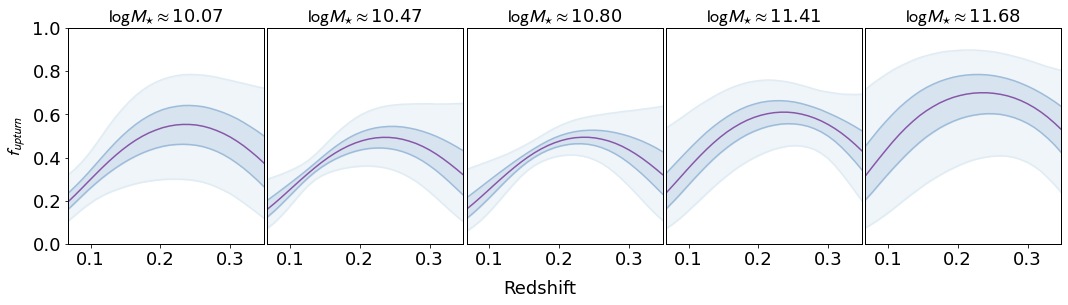

In [48]:
plt.subplots(figsize=(15,4))
for i in range(len(idx_m)):        
    subset = summary[summary['LOG_STELLAR_MASS']==chosen_mass[i]]
    plot_temp = plt.subplot(1, 5, (i+1))
    plt.plot(subset['Z'], subset['50%'], '-', color=fit_palette[2])
    plt.plot(subset['Z'], subset['25%'], '-', color=fit_palette[1])
    plt.plot(subset['Z'], subset['75%'], '-', color=fit_palette[1])
    plt.plot(subset['Z'], subset['2.5%'], '-', color=fit_palette[0])
    plt.plot(subset['Z'], subset['97.5%'], '-', color=fit_palette[0])
    plt.fill_between(subset['Z'], subset['25%'], subset['75%'], color=fit_palette[1], alpha=0.5)
    plt.fill_between(subset['Z'], subset['2.5%'], subset['97.5%'], color=fit_palette[0], alpha=0.5)
    plt.ylim([0,1.])
    plt.xlim([subset['Z'].min(), subset['Z'].max()])
    plt.title(r"$\log M_{\star} \approx$%.2f" % chosen_mass[i], fontsize=18)
    plt.rcParams.update(plotpars)

    if i==0:
        plt.ylabel(r"$f_{upturn}$")
    elif i>0:
        plot_temp.yaxis.set_visible(False)
        
    plt.tight_layout(w_pad=0.)
plt.text(x=-0.45, y=-0.23, s='Redshift', size=18)
plt.savefig(os.path.join(figs_paper_path, 'reg_all_noel_redshift.pdf'))
plt.show()

In [49]:
plt.text?

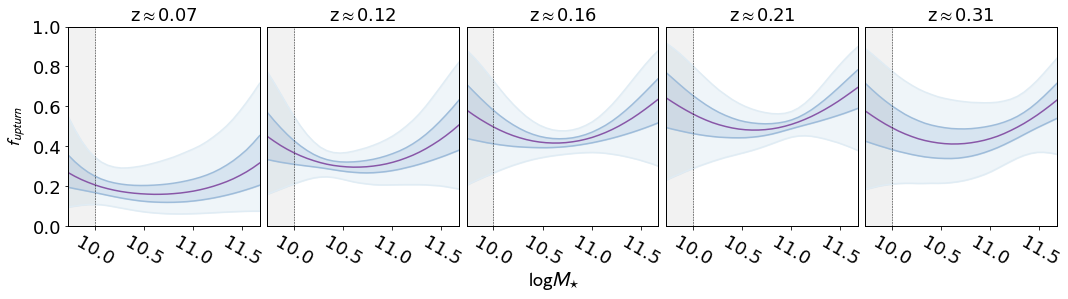

In [50]:
plt.subplots(figsize=(15,4))
for i in range(len(idx_z)):        
    subset = summary[summary['Z']==chosen_redshift[i]]
    plot_temp = plt.subplot(1, 5, (i+1))
    plt.plot(subset['LOG_STELLAR_MASS'], subset['50%'], '-', color=fit_palette[2])
    plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '-', color=fit_palette[1])
    plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '-', color=fit_palette[1])
    plt.plot(subset['LOG_STELLAR_MASS'], subset['2.5%'], '-', color=fit_palette[0])
    plt.plot(subset['LOG_STELLAR_MASS'], subset['97.5%'], '-', color=fit_palette[0])
    plt.fill_between(subset['LOG_STELLAR_MASS'], subset['25%'], subset['75%'], color=fit_palette[1], 
                     alpha=0.5)
    plt.fill_between(subset['LOG_STELLAR_MASS'], subset['2.5%'], subset['97.5%'], color=fit_palette[0],
                     alpha=0.5)
    plt.ylim([0,1.])
    plt.xlim([subset['LOG_STELLAR_MASS'].min(), subset['LOG_STELLAR_MASS'].max()])
    plt.xticks([10, 10.5, 11, 11.5])
    plt.tick_params(axis='x', which='major', rotation=-30)
    plt.title(r"z$\approx$%.2f" % chosen_redshift[i], fontsize=18)
    plt.rcParams.update(plotpars)
    plt.axvline(x=10, ls='--', lw=0.5, color='black')
    plt.axvspan(xmin=subset['LOG_STELLAR_MASS'].min(), xmax=10, facecolor='gray', alpha=0.1)

    if i==0:
        plt.ylabel(r"$f_{upturn}$")
    elif i>0:
        plot_temp.yaxis.set_visible(False)
        
    plt.tight_layout(w_pad=0.)
plt.text(x=6.3, y=-0.3, s=r"$\log M_{\star}$", size=20)
plt.savefig(os.path.join(figs_paper_path, 'reg_all_noel_mass.pdf'))
plt.show()

In [51]:
plt.tick_params??

In [52]:
posteriors_all = pd.read_csv('../../LargeFilesResults/Model/posteriors_noemlines.csv')

In [53]:
posteriors_all

,beta[1],beta[2],beta[3],beta[4],beta[5]
0,-3.685708,32.610873,-68.358126,-0.039401,-0.028859
1,-3.679616,30.225845,-60.233817,-0.089985,0.062002
2,-3.479198,30.017847,-63.905318,-0.093453,0.063950
3,-4.063318,29.893671,-49.725777,-0.111552,0.100827
4,-2.742927,24.280441,-56.647008,0.046149,0.064127
...,...,...,...,...,...
39995,-3.803785,31.678070,-64.263827,0.032643,0.077854
39996,-1.811527,16.110379,-40.640781,0.366430,0.123558
39997,-1.818247,15.772861,-41.602050,0.358179,0.122348
39998,-3.629019,31.157302,-69.699928,0.145169,0.134125


In [54]:
postall_dictionary = {}
for i in range(posteriors_all.keys().size):
    postall_dictionary['%s' % (posteriors_all.keys()[i])] = posteriors_all.values[i]

In [55]:
posteriors_all.keys()

Index(['beta[1]', 'beta[2]', 'beta[3]', 'beta[4]', 'beta[5]'], dtype='object')

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  """


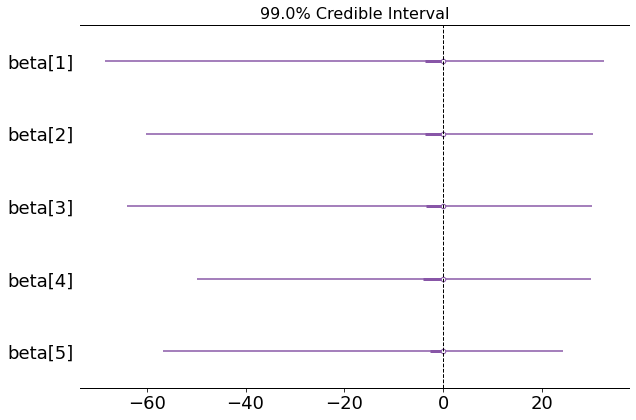

In [56]:
plt.rcParams.update(plotpars)
az.plot_forest(data=postall_dictionary, var_names=list(posteriors_all.keys()), figsize=(9,6), r_hat=False, 
               credible_interval=0.99, quartiles=True, colors='#8856a7')
plt.axvline(x=0, color='black', linewidth=1., linestyle='--')
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, '5betas_forest_revised.png'))
plt.savefig(os.path.join(figs_paper_path, '5betas_forest_revised.pdf'))
plt.show()

In [57]:
az.plot_forest?

In [58]:
sns.boxenplot??

In [59]:
plt.subplots?